<a href="https://colab.research.google.com/github/SharmaAshwini/UNT/blob/main/Methods%20in%20Empirical%20Analysis/Exercise_4_Text_Flatten_Filter_Chunk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ICE-4 Text Data: Flattening, Filtering, and Chunking

## (Tutorial) Bag of X
Following is a sample of applying bag of n-grams to Yelp academic dataset review, please download it with following link:

https://github.com/knowitall/yelp-dataset-challenge/blob/master/data/yelp_phoenix_academic_dataset/yelp_academic_dataset_review.json

In [ ]:
import pandas as pd
import json

In [ ]:
!gdown '1xQfCXyLriRv0Uxolq66ByXKHjcludtl1'

Downloading...
From: https://drive.google.com/uc?id=1xQfCXyLriRv0Uxolq66ByXKHjcludtl1
To: /content/yelp_academic_dataset_review.json
100% 216M/216M [00:04<00:00, 52.2MB/s]


In [ ]:
f = open('yelp_academic_dataset_review.json')
js = []
for i in range(10000):
    js.append(json.loads(f.readline()))
f.close()
review_df = pd.DataFrame(js)
review_df.shape

(10000, 8)

In [ ]:
review_df.head()

,votes,user_id,review_id,stars,date,text,type,business_id
0,"{'funny': 0, 'useful': 5, 'cool': 2}",rLtl8ZkDX5vH5nAx9C3q5Q,fWKvX83p0-ka4JS3dc6E5A,5,2011-01-26,My wife took me here on my birthday for breakf...,review,9yKzy9PApeiPPOUJEtnvkg
1,"{'funny': 0, 'useful': 0, 'cool': 0}",0a2KyEL0d3Yb1V6aivbIuQ,IjZ33sJrzXqU-0X6U8NwyA,5,2011-07-27,I have no idea why some people give bad review...,review,ZRJwVLyzEJq1VAihDhYiow
2,"{'funny': 0, 'useful': 1, 'cool': 0}",0hT2KtfLiobPvh6cDC8JQg,IESLBzqUCLdSzSqm0eCSxQ,4,2012-06-14,love the gyro plate. Rice is so good and I als...,review,6oRAC4uyJCsJl1X0WZpVSA
3,"{'funny': 0, 'useful': 2, 'cool': 1}",uZetl9T0NcROGOyFfughhg,G-WvGaISbqqaMHlNnByodA,5,2010-05-27,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,_1QQZuf4zZOyFCvXc0o6Vg
4,"{'funny': 0, 'useful': 0, 'cool': 0}",vYmM4KTsC8ZfQBg-j5MWkw,1uJFq2r5QfJG_6ExMRCaGw,5,2012-01-05,General Manager Scott Petello is a good egg!!!...,review,6ozycU1RpktNG2-1BroVtw


note: in the default settings of CountVectorizer, the token_pattern = '(?u)\\b\\w\\w+\\b', which ignores single-character words. Whe employ the token_pattern = '(?u)\\b\\w+\\b' to include the single-character words.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow_converter = CountVectorizer(token_pattern='(?u)\\b\\w+\\b')
x = bow_converter.fit_transform(review_df['text'])

In [ ]:
unigram = bow_converter.get_feature_names_out()

In [ ]:
bigram_converter = CountVectorizer(ngram_range=(2,2), token_pattern='(?u)\\b\\w+\\b')
x2 = bigram_converter.fit_transform(review_df['text'])

In [ ]:
bigram = bigram_converter.get_feature_names_out()

In [ ]:
trigram_converter = CountVectorizer(ngram_range=(3,3), token_pattern='(?u)\\b\\w+\\b')
x3 = trigram_converter.fit_transform(review_df['text'])

In [ ]:
trigram = trigram_converter.get_feature_names_out()

In [ ]:
unigram

array(['0', '00', '000', ..., 'école', 'ém', 'òc'], dtype=object)

In [ ]:
bigram

array(['0 0', '0 20', '0 39', ..., 'école lenôtre', 'ém all', 'òc châm'],
      dtype=object)

In [ ]:
trigram

array(['0 0 eye', '0 20 less', '0 39 oz', ..., 'école lenôtre trained',
       'ém all they', 'òc châm a'], dtype=object)

In [ ]:
print (len(unigram), len(bigram), len(trigram))

29222 368943 881620


In [ ]:
#%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns

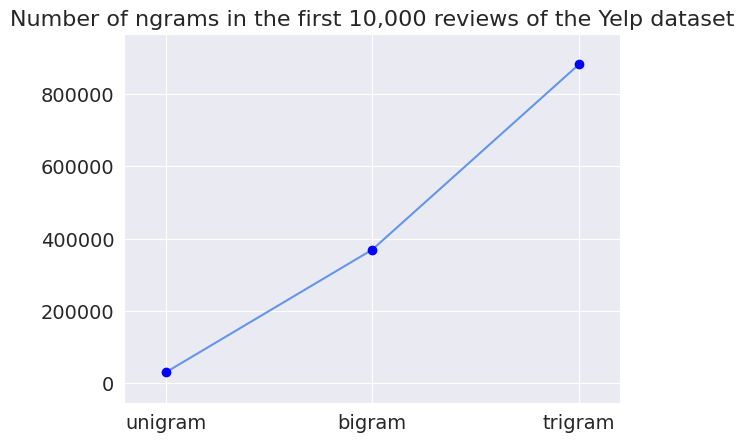

In [ ]:
sns.set_style("darkgrid")
counts = [len(unigram), len(bigram), len(trigram)]
plt.plot(counts, color='cornflowerblue')
plt.plot(counts, 'bo')
plt.margins(0.1)
plt.xticks(range(3), ['unigram', 'bigram', 'trigram'])
plt.tick_params(labelsize=14)
plt.title('Number of ngrams in the first 10,000 reviews of the Yelp dataset', {'fontsize':16})
plt.show()

## Task 1. 1 Applying the unigram, bigram, and trigram tokenization methods to the given text below.

In [ ]:
train_text = """My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.
Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.
I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.
It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.
It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!"""

# write your code here

data_text = [train_text]

In [ ]:
print(type(data_text))
print(data_text)

<class 'list'>
['My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  \nOur waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  \nI\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  \nIt came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  \nIt was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!']


In [ ]:
bow_converter = CountVectorizer(token_pattern='(?u)\\b\\w+\\b')
x = bow_converter.fit_transform(data_text)

unigram = bow_converter.get_feature_names_out()

In [ ]:
bigram_converter = CountVectorizer(ngram_range=(2,2), token_pattern='(?u)\\b\\w+\\b')
x2 = bigram_converter.fit_transform(data_text)

bigram = bigram_converter.get_feature_names_out()

In [ ]:
trigram_converter = CountVectorizer(ngram_range=(3,3), token_pattern='(?u)\\b\\w+\\b')
x3 = trigram_converter.fit_transform(data_text)

trigram = trigram_converter.get_feature_names_out()

In [ ]:
print(unigram)

['2' 'a' 'absolute' 'absolutely' 'amazing' 'an' 'and' 'anyway' 'arrived'
 'back' 'best' 'better' 'birthday' 'blend' 'bloody' 'bread' 'breakfast'
 'busy' 'came' 'can' 'complete' 'delicious' 'do' 'earlier' 'eggs' 'ever'
 'everything' 'excellent' 'favor' 'fills' 'food' 'for' 'fresh' 'from'
 'garden' 'get' 'go' 'griddled' 'grounds' 'had' 'here' 'i' 'ingredients'
 'it' 'like' 'looked' 'looks' 'm' 'made' 'mary' 'me' 'meal' 'menu'
 'morning' 'my' 'of' 'on' 'only' 'order' 'our' 'outside' 'overlooking'
 'perfect' 'phenomenal' 'pieces' 'place' 'pleasure' 'pretty' 'quickly'
 'saturday' 'scrambled' 'semi' 'simply' 'sitting' 'skillet' 'so' 'sure'
 't' 'tasty' 'the' 'their' 'them' 'they' 'to' 'toast' 'took' 'truffle'
 'up' 'use' 've' 'vegetable' 'wait' 'waitress' 'was' 'weather' 'when'
 'which' 'while' 'white' 'wife' 'with' 'you' 'yourself']


In [ ]:
print(bigram)

['2 pieces' 'a favor' 'absolute pleasure' 'absolutely made' 'amazing and'
 'amazing while' 'an absolute' 'and blend' 'and delicious' 'and get'
 'and it' 'and our' 'and simply' 'anyway i' 'arrived quickly' 'best i'
 'best toast' 'better do' 'birthday for' 'blend them' 'bloody mary'
 'bread with' 'breakfast and' 'busy saturday' 'came with' 'can t'
 'complete it' 'delicious it' 'do yourself' 'earlier you' 'eggs vegetable'
 'ever had' 'everything on' 'excellent and' 'excellent i' 'excellent the'
 'favor and' 'fills up' 'food arrived' 'for breakfast' 'fresh when'
 'from their' 'garden and' 'get here' 'get their' 'go back'
 'griddled bread' 'grounds an' 'had anyway' 'had i' 'had the' 'here on'
 'here the' 'i can' 'i had' 'i m' 'i ve' 'ingredients from'
 'it absolutely' 'it came' 'it it' 'it looked' 'it was' 'like the'
 'looked like' 'looks excellent' 'm pretty' 'made sitting' 'made the'
 'mary it' 'me here' 'meal complete' 'menu looks' 'morning it'
 'my birthday' 'my wife' 'of their' 'on my'

In [ ]:
print(trigram)

['2 pieces of' 'a favor and' 'absolute pleasure our' 'absolutely made the'
 'amazing and it' 'amazing while everything' 'an absolute pleasure'
 'and blend them' 'and delicious it' 'and get their' 'and it absolutely'
 'and it was' 'and our food' 'and simply the' 'anyway i can'
 'arrived quickly on' 'best i ve' 'best toast i' 'better do yourself'
 'birthday for breakfast' 'blend them fresh' 'bloody mary it'
 'bread with was' 'breakfast and it' 'busy saturday morning' 'came with 2'
 'can t wait' 'complete it was' 'delicious it came' 'do yourself a'
 'earlier you get' 'eggs vegetable skillet' 'ever had anyway' 'ever had i'
 'everything on the' 'excellent and our' 'excellent i had'
 'excellent the weather' 'favor and get' 'fills up pretty'
 'food arrived quickly' 'for breakfast and' 'fresh when you'
 'from their garden' 'garden and blend' 'get here the' 'get their bloody'
 'griddled bread with' 'grounds an absolute' 'had anyway i' 'had i m'
 'had the white' 'here on my' 'here the better' 'i

In [ ]:
print (len(unigram), len(bigram), len(trigram))

103 146 155


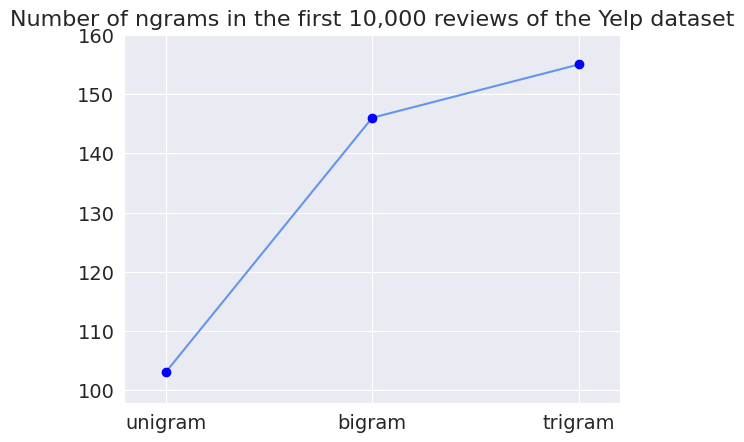

In [ ]:
sns.set_style("darkgrid")
counts = [len(unigram), len(bigram), len(trigram)]
plt.plot(counts, color='cornflowerblue')
plt.plot(counts, 'bo')
plt.margins(0.1)
plt.xticks(range(3), ['unigram', 'bigram', 'trigram'])
plt.tick_params(labelsize=14)
plt.title('Number of ngrams in the first 10,000 reviews of the Yelp dataset', {'fontsize':16})
plt.show()

## Task 1.2 Create your own naive tokenization method (whitespace-based), and apply it to the text given in the task 1.1
note: 1. do not use the existing togkenization methods given by NLP; 2. split the words by whitespace character, the output is more likely as the unigram; 3. no repeating elements in the output.

In [ ]:
# write you code here
new_text_list = train_text.split(' ')
print(len(new_text_list))

token_text_list = []

for i in range(len(new_text_list)):
  #print(new_text_list[i])
  if new_text_list[i] in token_text_list:
    continue
  else:
    token_text_list.append(new_text_list[i])

print(len(token_text_list))
token_text_list.sort()
print(token_text_list)

#as it's naive based only on whitespace, it's repeating words like 'excellent', 'excellent,', 'excellent.' as they are 3 different words (with ',' & '.')

160
110
['', "\nI'm", '\nIt', '\nOur', '"toast"', '2', 'Bloody', 'EVERYTHING', 'I', "I've", 'It', 'Mary.', 'My', 'Saturday', 'The', 'a', 'absolute', 'absolutely', 'amazing', 'amazing.\n\nWhile', 'an', 'and', 'arrived', 'back!', 'best', 'better.\n\nDo', 'birthday', 'blend', 'bread', 'breakfast', 'came', "can't", 'complete.', 'delicious.', 'earlier', 'eggs', 'ever', 'excellent', 'excellent,', 'excellent.', 'favor', 'fills', 'food', 'for', 'fresh', 'from', 'garden', 'get', 'go', 'griddled', 'grounds', 'had', 'had.', 'had.\n\nAnyway,', 'here', 'ingredients', 'it', 'it.', 'like', 'looked', 'looks', 'made', 'me', 'meal', 'menu', 'morning.', 'my', 'of', 'on', 'only', 'order', 'our', 'outside', 'overlooking', 'perfect', 'phenomenal', 'pieces', 'place', 'pleasure.', 'pretty', 'quickly', 'scrambled', 'semi-busy', 'simply', 'sitting', 'skillet', 'so', 'sure', 'tasty', 'the', 'their', 'them', 'they', 'to', 'took', 'truffle', 'up', 'use', 'vegetable', 'wait', 'waitress', 'was', 'weather', 'when', '

## **Question 1**. Given a sentence "He likes cat". In unigram representation, it could be "He", "likes", "cat". In bigram representation, it could be "He likes", "likes cat". In trigram representation, it could be "He likes cat". Explain why the storage and computation cost increase with the growth of n in n-gram methods.

Answer to Q1: type your answer here:

---

## (Tutorial) Stemming and Lemmatization

In [ ]:
# import PorterStemmer class form nltk.stem.porter module
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

stem = stemmer.stem('flowers')
print(f"'flowers' after stemming: {stem}")

stem = stemmer.stem('zeroes')
print(f"'zeroes' after stemming: {stem}")

stem = stemmer.stem('better')
print(f"'better' after stemming: {stem}")

stem = stemmer.stem('sixties')
print(f"'sixties' after stemming: {stem}")

stem = stemmer.stem('goes')
print(f"'goes' after stemming: {stem}")

stem = stemmer.stem('go')
print(f"'go' after stemming: {stem}")

'flowers' after stemming: flower
'zeroes' after stemming: zero
'better' after stemming: better
'sixties' after stemming: sixti
'goes' after stemming: goe
'go' after stemming: go


In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# import lemmatizer class from nltk.stem module
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

lemma = lemmatizer.lemmatize('flowers')
print(f"'flowers' after lemmatization: {lemma}")

lemma = lemmatizer.lemmatize('zeros')
print(f"'zeros' after lemmatization: {lemma}")

lemma = lemmatizer.lemmatize('better')
print(f"'better' after lemmatization: {lemma}")

lemma = lemmatizer.lemmatize('sixties')
print(f"'sixties' after lemmatization: {lemma}")

lemma = lemmatizer.lemmatize('goes')
print(f"'goes' after lemmatization: {lemma}")

lemma = lemmatizer.lemmatize('go')
print(f"'go' after lemmatization: {lemma}")

print("\n\n")
lemma = lemmatizer.lemmatize('better', pos='a')   # 'a' denoted ADJECTIVE part-of-speech
print(f"'better' (as an adjective) after lemmatization: {lemma}")

'flowers' after lemmatization: flower
'zeros' after lemmatization: zero
'better' after lemmatization: better
'sixties' after lemmatization: sixty
'goes' after lemmatization: go
'go' after lemmatization: go



'better' (as an adjective) after lemmatization: good


## Task 2. Text filtering for cleaner feature
1. clean the text used in the task 1; 2. remove all punctuations; 3. convert all characters to their lowercase; 4. remove all words in "stopwords"; 5. remove all relatively meaningless words like " 've ", " 's ", etc. 6. after finishing the above operations, apply stemming and lemmatization to the cleaned text respectively.

In [ ]:
# write your code here

train_text = """My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.
Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.
I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.
It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.
It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!"""


In [ ]:
train_text_1 = train_text.replace("\r", " ")
print(train_text_1)

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  
Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  
I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  
It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  
It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [ ]:
train_text_2 = train_text_1.replace("\n", " ")
print(train_text_2)

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.   Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.  Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.   I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.  While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.   It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.   It was the best "toast" I've ever had.  Anyway, I can't wait to go back!


In [ ]:
train_text_3 = train_text_2.replace("    ", " ")
print(train_text_3)

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.   Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.  Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.   I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.  While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.   It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.   It was the best "toast" I've ever had.  Anyway, I can't wait to go back!


In [ ]:
train_text_4 = train_text_3.replace('"', '')
print(train_text_4)

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.   Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.  Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.   I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.  While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.   It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.   It was the best toast I've ever had.  Anyway, I can't wait to go back!


In [ ]:
train_text_4_lower = train_text_4.lower()
print(train_text_4_lower)

my wife took me here on my birthday for breakfast and it was excellent.  the weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.   our waitress was excellent and our food arrived quickly on the semi-busy saturday morning.  it looked like the place fills up pretty quickly so the earlier you get here the better.  do yourself a favor and get their bloody mary.  it was phenomenal and simply the best i've ever had.   i'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  it was amazing.  while everything on the menu looks excellent, i had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.   it came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.   it was the best toast i've ever had.  anyway, i can't wait to go back!


In [ ]:
tt_4_lower_punct = train_text_4_lower
punctuation_signs = list("?:!.,;")
for punct_sign in punctuation_signs:
  tt_4_lower_punct = tt_4_lower_punct.replace(punct_sign, '')

print(tt_4_lower_punct)

my wife took me here on my birthday for breakfast and it was excellent  the weather was perfect which made sitting outside overlooking their grounds an absolute pleasure   our waitress was excellent and our food arrived quickly on the semi-busy saturday morning  it looked like the place fills up pretty quickly so the earlier you get here the better  do yourself a favor and get their bloody mary  it was phenomenal and simply the best i've ever had   i'm pretty sure they only use ingredients from their garden and blend them fresh when you order it  it was amazing  while everything on the menu looks excellent i had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious   it came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete   it was the best toast i've ever had  anyway i can't wait to go back


In [ ]:
tt_lower_punct_5 = tt_4_lower_punct.replace("'s", "")
tt_lower_punct_5 = tt_lower_punct_5.replace("'ve", "")
tt_lower_punct_6 = tt_lower_punct_5.replace("'m", "")
print(tt_lower_punct_6)

my wife took me here on my birthday for breakfast and it was excellent  the weather was perfect which made sitting outside overlooking their grounds an absolute pleasure   our waitress was excellent and our food arrived quickly on the semi-busy saturday morning  it looked like the place fills up pretty quickly so the earlier you get here the better  do yourself a favor and get their bloody mary  it was phenomenal and simply the best i ever had   i pretty sure they only use ingredients from their garden and blend them fresh when you order it  it was amazing  while everything on the menu looks excellent i had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious   it came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete   it was the best toast i ever had  anyway i can't wait to go back


In [ ]:
from nltk.corpus import stopwords
import re
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = list(stopwords.words('english'))
stop_words[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
tt_lower_punct_sp_7 = tt_lower_punct_6

for stop_word in stop_words:
  tt_lower_punct_sp_7 = re.sub(r"\b%s\b" % stop_word, '', tt_lower_punct_sp_7)

print(tt_lower_punct_sp_7)

 wife took     birthday  breakfast    excellent   weather  perfect  made sitting outside overlooking  grounds  absolute pleasure    waitress  excellent   food arrived quickly   semi-busy saturday morning   looked like  place fills  pretty quickly   earlier  get   better     favor  get  bloody mary    phenomenal  simply  best  ever     pretty sure   use ingredients   garden  blend  fresh   order     amazing   everything   menu looks excellent    white truffle scrambled eggs vegetable skillet    tasty  delicious    came  2 pieces   griddled bread   amazing   absolutely made  meal complete      best toast  ever   anyway  ' wait  go back


In [ ]:
tt_lower_punct_sp_7 = tt_lower_punct_sp_7.replace("'", "")

In [ ]:
new_text_list_1 = tt_lower_punct_sp_7.split(' ')

token_text_list_1 = []

while("" in new_text_list_1) :
    new_text_list_1.remove("")
print(new_text_list_1)

for i in range(len(new_text_list_1)):
  #print(new_text_list[i])
  if new_text_list_1[i] in token_text_list_1:
    continue
  else:
    token_text_list_1.append(new_text_list_1[i])

token_text_list_1.sort()
print(token_text_list_1)

['wife', 'took', 'birthday', 'breakfast', 'excellent', 'weather', 'perfect', 'made', 'sitting', 'outside', 'overlooking', 'grounds', 'absolute', 'pleasure', 'waitress', 'excellent', 'food', 'arrived', 'quickly', 'semi-busy', 'saturday', 'morning', 'looked', 'like', 'place', 'fills', 'pretty', 'quickly', 'earlier', 'get', 'better', 'favor', 'get', 'bloody', 'mary', 'phenomenal', 'simply', 'best', 'ever', 'pretty', 'sure', 'use', 'ingredients', 'garden', 'blend', 'fresh', 'order', 'amazing', 'everything', 'menu', 'looks', 'excellent', 'white', 'truffle', 'scrambled', 'eggs', 'vegetable', 'skillet', 'tasty', 'delicious', 'came', '2', 'pieces', 'griddled', 'bread', 'amazing', 'absolutely', 'made', 'meal', 'complete', 'best', 'toast', 'ever', 'anyway', 'wait', 'go', 'back']
['2', 'absolute', 'absolutely', 'amazing', 'anyway', 'arrived', 'back', 'best', 'better', 'birthday', 'blend', 'bloody', 'bread', 'breakfast', 'came', 'complete', 'delicious', 'earlier', 'eggs', 'ever', 'everything', 'ex

In [ ]:
#stemming
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

stemming_list = []

for i in range(len(token_text_list_1)):
  stem = stemmer.stem(token_text_list_1[i])
  stemming_list.append(stem)


In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#lemmetization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

lemma_list = []

for i in range(len(token_text_list_1)):
  lemma = lemmatizer.lemmatize(token_text_list_1[i])
  lemma_list.append(lemma)


In [ ]:
print('Clean Tokens:')
print(token_text_list_1)

print('\nAfter Stemming:')
print(stemming_list)

print('\nAfter Lemmatization:')
print(lemma_list)

Clean Tokens:
['2', 'absolute', 'absolutely', 'amazing', 'anyway', 'arrived', 'back', 'best', 'better', 'birthday', 'blend', 'bloody', 'bread', 'breakfast', 'came', 'complete', 'delicious', 'earlier', 'eggs', 'ever', 'everything', 'excellent', 'favor', 'fills', 'food', 'fresh', 'garden', 'get', 'go', 'griddled', 'grounds', 'ingredients', 'like', 'looked', 'looks', 'made', 'mary', 'meal', 'menu', 'morning', 'order', 'outside', 'overlooking', 'perfect', 'phenomenal', 'pieces', 'place', 'pleasure', 'pretty', 'quickly', 'saturday', 'scrambled', 'semi-busy', 'simply', 'sitting', 'skillet', 'sure', 'tasty', 'toast', 'took', 'truffle', 'use', 'vegetable', 'wait', 'waitress', 'weather', 'white', 'wife']

After Stemming:
['2', 'absolut', 'absolut', 'amaz', 'anyway', 'arriv', 'back', 'best', 'better', 'birthday', 'blend', 'bloodi', 'bread', 'breakfast', 'came', 'complet', 'delici', 'earlier', 'egg', 'ever', 'everyth', 'excel', 'favor', 'fill', 'food', 'fresh', 'garden', 'get', 'go', 'griddl', 'g

## **Question 2.** Based on the examples and the output of your code, which one has the better performance, Stemming or Lemmatization? Try to analyze it.

**Answer to Q2**: type your answer here

---

## (Tutorial) PoS tagging and chunking

**note:** you need to install spacy and textblob modules first for the following codes
If you have problem to install spacy module, try to follow the instruction in the following link:
https://stackoverflow.com/questions/66149878/e053-could-not-read-config-cfg-resumeparser
If you have problem to use textblob module, try to install nltk libraries as shown in the following link:
http://www.nltk.org/data.html

In [ ]:
# Load the first 10 reviews
f = open('yelp_academic_dataset_review.json')
js = []
for i in range(10):
    js.append(json.loads(f.readline()))
f.close()
review_df = pd.DataFrame(js)
review_df.shape

(10, 8)

In [ ]:
# chunking in spaCy
import spacy
spacy.info('en_core_web_sm')

{'lang': 'en',
 'name': 'core_web_sm',
 'version': '3.5.0',
 'description': 'English pipeline optimized for CPU. Components: tok2vec, tagger, parser, senter, ner, attribute_ruler, lemmatizer.',
 'author': 'Explosion',
 'email': 'contact@explosion.ai',
 'url': 'https://explosion.ai',
 'license': 'MIT',
 'spacy_version': '>=3.5.0,<3.6.0',
 'spacy_git_version': '9e0322de1',
 'vectors': {'width': 0, 'vectors': 0, 'keys': 0, 'name': None},
 'labels': {'tok2vec': [],
  'tagger': ['$',
   "''",
   ',',
   '-LRB-',
   '-RRB-',
   '.',
   ':',
   'ADD',
   'AFX',
   'CC',
   'CD',
   'DT',
   'EX',
   'FW',
   'HYPH',
   'IN',
   'JJ',
   'JJR',
   'JJS',
   'LS',
   'MD',
   'NFP',
   'NN',
   'NNP',
   'NNPS',
   'NNS',
   'PDT',
   'POS',
   'PRP',
   'PRP$',
   'RB',
   'RBR',
   'RBS',
   'RP',
   'SYM',
   'TO',
   'UH',
   'VB',
   'VBD',
   'VBG',
   'VBN',
   'VBP',
   'VBZ',
   'WDT',
   'WP',
   'WP$',
   'WRB',
   'XX',
   '_SP',
   '``'],
  'parser': ['ROOT',
   'acl',
   'acomp',


In [ ]:
nlp = spacy.load("en_core_web_sm")
doc_df = review_df['text'].apply(nlp)
type(doc_df)

pandas.core.series.Series

In [ ]:
type(doc_df[0])

spacy.tokens.doc.Doc

In [ ]:
doc_df[4]

General Manager Scott Petello is a good egg!!! Not to go into detail, but let me assure you if you have any issues (albeit rare) speak with Scott and treat the guy with some respect as you state your case and I'd be surprised if you don't walk out totally satisfied as I just did. Like I always say..... "Mistakes are inevitable, it's how we recover from them that is important"!!!

Thanks to Scott and his awesome staff. You've got a customer for life!! .......... :^)

In [ ]:
for doc in doc_df[4]:
    print(doc.text, doc.pos_, doc.tag_)

General PROPN NNP
Manager PROPN NNP
Scott PROPN NNP
Petello PROPN NNP
is AUX VBZ
a DET DT
good ADJ JJ
egg NOUN NN
! PUNCT .
! PUNCT .
! PUNCT .
Not PART RB
to PART TO
go VERB VB
into ADP IN
detail NOUN NN
, PUNCT ,
but CCONJ CC
let VERB VB
me PRON PRP
assure VERB VB
you PRON PRP
if SCONJ IN
you PRON PRP
have VERB VBP
any DET DT
issues NOUN NNS
( PUNCT -LRB-
albeit ADV RB
rare ADJ JJ
) PUNCT -RRB-
speak VERB VBP
with ADP IN
Scott PROPN NNP
and CCONJ CC
treat VERB VB
the DET DT
guy NOUN NN
with ADP IN
some DET DT
respect NOUN NN
as SCONJ IN
you PRON PRP
state VERB VBP
your PRON PRP$
case NOUN NN
and CCONJ CC
I PRON PRP
'd AUX MD
be AUX VB
surprised ADJ JJ
if SCONJ IN
you PRON PRP
do AUX VBP
n't PART RB
walk VERB VB
out ADP RP
totally ADV RB
satisfied ADJ JJ
as SCONJ IN
I PRON PRP
just ADV RB
did VERB VBD
. PUNCT .
Like INTJ UH
I PRON PRP
always ADV RB
say VERB VBP
..... PUNCT :
" PUNCT ``
Mistakes NOUN NNS
are AUX VBP
inevitable ADJ JJ
, PUNCT ,
it PRON PRP
's AUX VBZ
how SCONJ WRB
we PR

In [ ]:
# spaCy also does some basic noun chunking
print([chunk for chunk in doc_df[4].noun_chunks])

[General Manager Scott Petello, a good egg, detail, me, you, you, any issues, Scott, the guy, some respect, you, your case, I, you, I, I, Mistakes, it, we, them, that, Thanks, Scott, his awesome staff, You, a customer, life]


In [ ]:
# chunking in textblob

from textblob import TextBlob
blob_df = review_df['text'].apply(TextBlob)
type(blob_df)

pandas.core.series.Series

In [ ]:
type(blob_df[4])

textblob.blob.TextBlob

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [ ]:
blob_df[4].tags

[('General', 'NNP'),
 ('Manager', 'NNP'),
 ('Scott', 'NNP'),
 ('Petello', 'NNP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('good', 'JJ'),
 ('egg', 'NN'),
 ('Not', 'RB'),
 ('to', 'TO'),
 ('go', 'VB'),
 ('into', 'IN'),
 ('detail', 'NN'),
 ('but', 'CC'),
 ('let', 'VB'),
 ('me', 'PRP'),
 ('assure', 'VB'),
 ('you', 'PRP'),
 ('if', 'IN'),
 ('you', 'PRP'),
 ('have', 'VBP'),
 ('any', 'DT'),
 ('issues', 'NNS'),
 ('albeit', 'IN'),
 ('rare', 'NN'),
 ('speak', 'NN'),
 ('with', 'IN'),
 ('Scott', 'NNP'),
 ('and', 'CC'),
 ('treat', 'VB'),
 ('the', 'DT'),
 ('guy', 'NN'),
 ('with', 'IN'),
 ('some', 'DT'),
 ('respect', 'NN'),
 ('as', 'IN'),
 ('you', 'PRP'),
 ('state', 'NN'),
 ('your', 'PRP$'),
 ('case', 'NN'),
 ('and', 'CC'),
 ('I', 'PRP'),
 ("'d", 'MD'),
 ('be', 'VB'),
 ('surprised', 'VBN'),
 ('if', 'IN'),
 ('you', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('walk', 'VB'),
 ('out', 'RP'),
 ('totally', 'RB'),
 ('satisfied', 'JJ'),
 ('as', 'IN'),
 ('I', 'PRP'),
 ('just', 'RB'),
 ('did', 'VBD'),
 ('Like', 'IN'),
 ('

In [ ]:
# textblob can do some basic noun chunking
print([np for np in blob_df[4].noun_phrases])

['general manager', 'scott petello', 'good egg', 'scott', "n't walk", 'mistakes', 'thanks', 'scott', 'awesome staff']


## Task 3. Apply spacy and textblob chunking to the text used in tesk 1 respectively, and output the noun phrase chunking results

In [ ]:
# write your code here

train_text = """My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.
Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.
I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.
It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.
It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!"""



In [ ]:
doc = nlp(train_text)
type(doc_df)
for token in doc:
    print(token.text, token.pos_, token.dep_, token.tag_)


My PRON poss PRP$
wife NOUN nsubj NN
took VERB ROOT VBD
me PRON dobj PRP
here ADV advmod RB
on ADP prep IN
my PRON poss PRP$
birthday NOUN pobj NN
for ADP prep IN
breakfast NOUN pobj NN
and CCONJ cc CC
it PRON nsubj PRP
was AUX conj VBD
excellent ADJ acomp JJ
. PUNCT punct .
  SPACE dep _SP
The DET det DT
weather NOUN nsubj NN
was AUX ROOT VBD
perfect ADJ acomp JJ
which PRON nsubj WDT
made VERB advcl VBD
sitting VERB xcomp VBG
outside ADV advmod RB
overlooking VERB advcl VBG
their PRON poss PRP$
grounds NOUN dobj NNS
an DET det DT
absolute ADJ amod JJ
pleasure NOUN dobj NN
. PUNCT punct .
 
 SPACE dep _SP
Our PRON poss PRP$
waitress NOUN nsubj NN
was AUX ROOT VBD
excellent ADJ acomp JJ
and CCONJ cc CC
our PRON poss PRP$
food NOUN nsubj NN
arrived VERB conj VBD
quickly ADV advmod RB
on ADP prep IN
the DET det DT
semi ADJ pobj JJ
- ADJ pobj JJ
busy ADJ amod JJ
Saturday PROPN compound NNP
morning NOUN pobj NN
. PUNCT punct .
  SPACE dep _SP
It PRON nsubj PRP
looked VERB ROOT VBD
like SCON

In [ ]:
# spaCy also does some basic noun chunking
print([chunk for chunk in doc.noun_chunks])

[My wife, me, my birthday, breakfast, it, The weather, which, their grounds, an absolute pleasure, Our waitress, our food, busy Saturday morning, It, the place, you, yourself, a favor, their Bloody Mary, It, I, I, they, ingredients, their garden, them, you, it, It, EVERYTHING, the menu, I, the white truffle scrambled eggs vegetable skillet, it, It, 2 pieces, their griddled bread, it, the meal, It, the best "toast, I, I]


In [ ]:
# chunking in textblob

blob = TextBlob(train_text)
type(blob)

textblob.blob.TextBlob

In [ ]:
blob.tags

[('My', 'PRP$'),
 ('wife', 'NN'),
 ('took', 'VBD'),
 ('me', 'PRP'),
 ('here', 'RB'),
 ('on', 'IN'),
 ('my', 'PRP$'),
 ('birthday', 'NN'),
 ('for', 'IN'),
 ('breakfast', 'NN'),
 ('and', 'CC'),
 ('it', 'PRP'),
 ('was', 'VBD'),
 ('excellent', 'JJ'),
 ('The', 'DT'),
 ('weather', 'NN'),
 ('was', 'VBD'),
 ('perfect', 'JJ'),
 ('which', 'WDT'),
 ('made', 'VBD'),
 ('sitting', 'VBG'),
 ('outside', 'IN'),
 ('overlooking', 'VBG'),
 ('their', 'PRP$'),
 ('grounds', 'NNS'),
 ('an', 'DT'),
 ('absolute', 'JJ'),
 ('pleasure', 'NN'),
 ('Our', 'PRP$'),
 ('waitress', 'NN'),
 ('was', 'VBD'),
 ('excellent', 'JJ'),
 ('and', 'CC'),
 ('our', 'PRP$'),
 ('food', 'NN'),
 ('arrived', 'VBD'),
 ('quickly', 'RB'),
 ('on', 'IN'),
 ('the', 'DT'),
 ('semi-busy', 'JJ'),
 ('Saturday', 'NNP'),
 ('morning', 'NN'),
 ('It', 'PRP'),
 ('looked', 'VBD'),
 ('like', 'IN'),
 ('the', 'DT'),
 ('place', 'NN'),
 ('fills', 'VBZ'),
 ('up', 'RP'),
 ('pretty', 'RB'),
 ('quickly', 'RB'),
 ('so', 'IN'),
 ('the', 'DT'),
 ('earlier', 'JJR'),
 (

In [ ]:
# textblob can do some basic noun chunking
print([np for np in blob.noun_phrases])

['absolute pleasure', 'place fills', 'bloody mary', 'everything', 'white truffle', 'vegetable skillet', 'anyway', "ca n't"]


## **Question 3**. Comparing the outputs of spacy and textblob chunking in tast 3, which one would you like to use in your application? Explain it.

**Answer to Q3**: type your answer here

---

## Question 4. Whats the disadvantage in bag of words  . Please explain in your own words with an example .

## Write code for the example.

### Answer to Q4: type your answer here and code in next block